In [15]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns 
import matplotlib.pyplot as plt  
import warnings 
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = [10,5]

suicides = pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")
del suicides['HDI for year']
del suicides['country-year']


iso_country_map = pd.read_csv("../input/countries-iso-codes/wikipedia-iso-country-codes.csv")
iso_country_map = iso_country_map.rename(columns = {'English short name lower case':"country"})


concap =pd.read_csv("../input/country-to-continent/countryContinent.csv", encoding='iso-8859-1')[['code_3', 'continent', 'sub_region']]
concap = concap.rename(columns = {'code_3':"Alpha-3 code"})

correct_names = {'Cabo Verde': 'Cape Verde', 'Macau': 'Macao', 'Republic of Korea': "Korea, Democratic People's Republic of" , 
 'Russian Federation': 'Russia',
 'Saint Vincent and Grenadines':'Saint Vincent and the Grenadines' 
 , 'United States': 'United States Of America'}

def correct_country(x):
    if x in correct_names:
        return correct_names[x]
    else:
        return x

suicides['country'] = suicides['country'].apply(lambda x : correct_country(x))

suicides = pd.merge(suicides,iso_country_map,on='country',how='left')
suicides = pd.merge(suicides,concap,on='Alpha-3 code',how='left')
suicides['gdp'] = suicides['gdp_per_capita ($)']*suicides['population']

In [16]:
suicides

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2,continent,sub_region,gdp
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,249068400
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,245168000
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,230601200
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,17352800
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,218342800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,8360503397
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,804605685
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,6377822822
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,6076364400


In [17]:
suicides.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2,continent,sub_region,gdp
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,249068400
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,245168000
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,230601200
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,17352800
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,218342800


In [18]:
df1= suicides.copy()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  Alpha-2 code        27820 non-null  object 
 11  Alpha-3 code        27820 non-null  object 
 12  Numeric code        27820 non-null  int64  
 13  ISO 3166-2          27820 non-null  object 
 14  continent           27820 non-null  object 
 15  sub_region          27820 non-null  object 
 16  gdp 

# 1- Global Suicides(per 100K)-trend over time 1985-2016

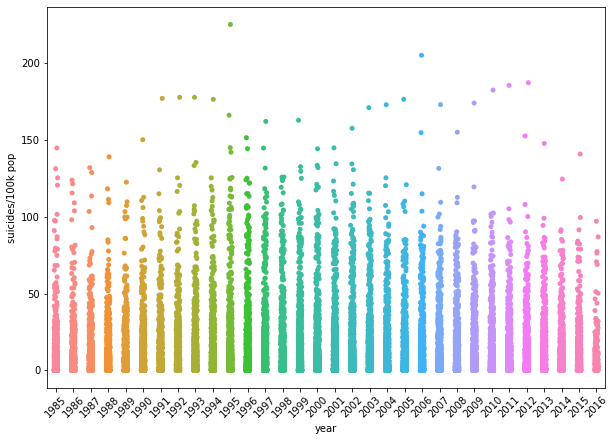

In [19]:
plt.figure(figsize=(10,7))
sns.stripplot(x="year",y='suicides/100k pop',data=df1)
plt.xticks(rotation=45)
plt.show()

# 2- Global Suicides(per 100K) by Continent

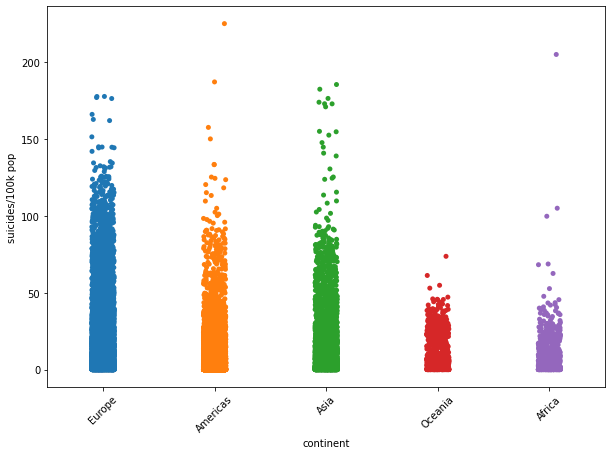

In [20]:
plt.figure(figsize=(10,7))
sns.stripplot(x="continent",y='suicides/100k pop',data=df1)
plt.xticks(rotation=45)
plt.show()

# 3-Global Suicides(per 100k) by Gender and trend over time 1985-2016

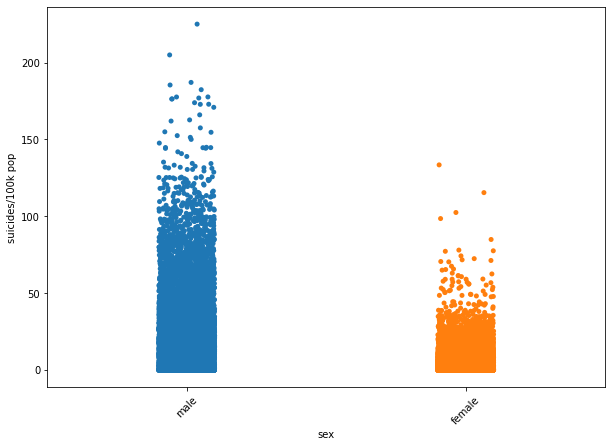

In [21]:
plt.figure(figsize=(10,7))
sns.stripplot(x="sex",y='suicides/100k pop',data=df1)
plt.xticks(rotation=45)
plt.show()

# 4-Population-gdp_per_capita Plot

KeyboardInterrupt: 

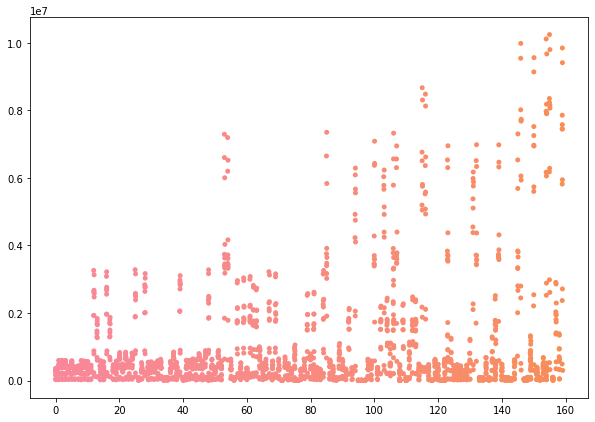

In [44]:
#px.scatter(df1,x = 'gdp_per_capita ($)', y = 'population')


plt.figure(figsize=(10,7))
sns.stripplot(x="gdp_per_capita ($)",y='population',data=df1)
plt.xticks(rotation=45)
plt.show()

# 5- Correlation between GDP(per Capita) and suicides per 100k

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



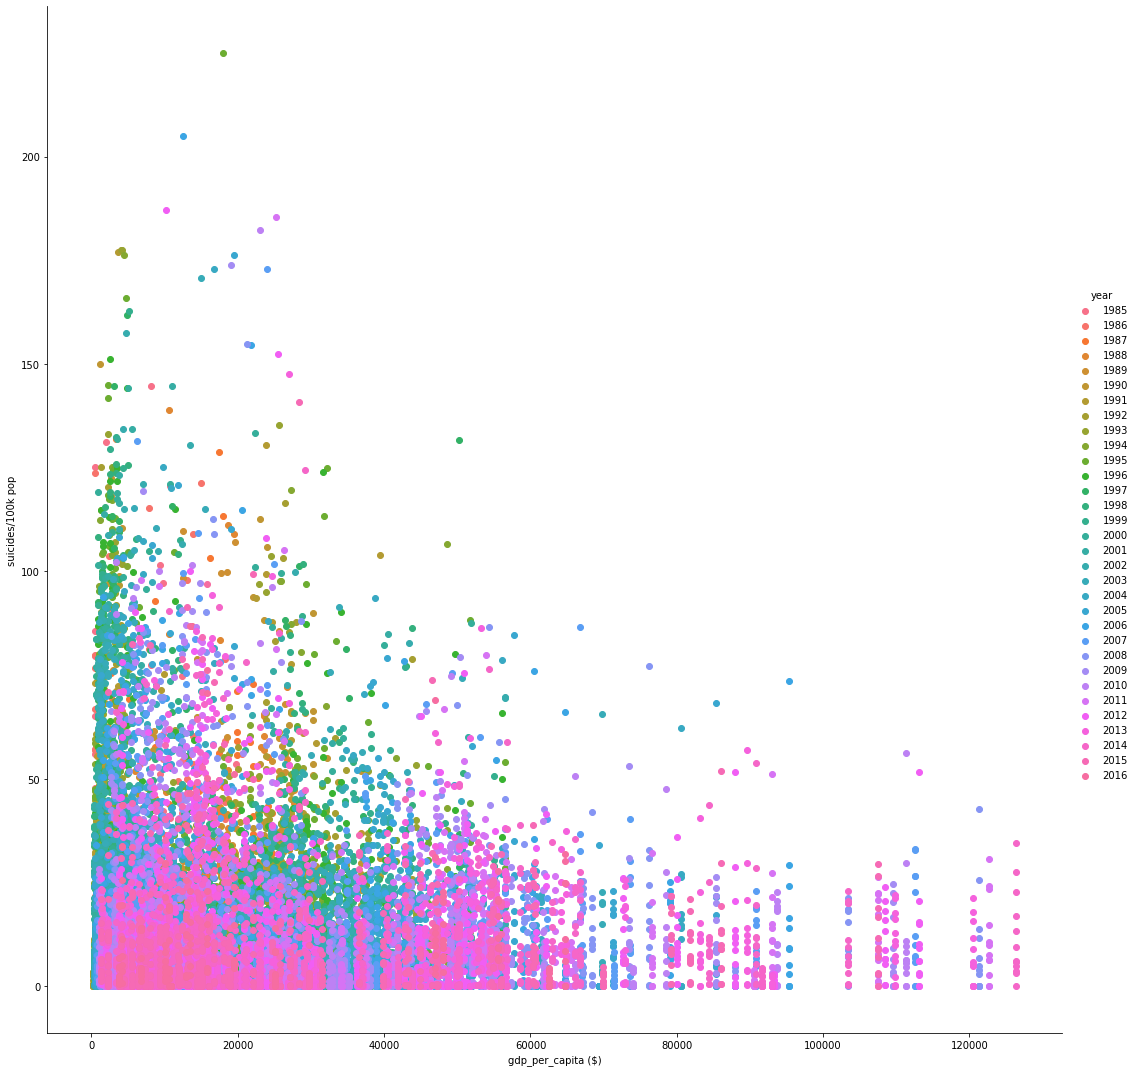

In [24]:
sns.FacetGrid(df1,hue='year',size=15).map(plt.scatter,'gdp_per_capita ($)','suicides/100k pop').add_legend()
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'year'),
  Text(1.5, 0, 'suicides_no'),
  Text(2.5, 0, 'population'),
  Text(3.5, 0, 'suicides/100k pop'),
  Text(4.5, 0, 'gdp_per_capita ($)'),
  Text(5.5, 0, 'Numeric code'),
  Text(6.5, 0, 'gdp')])

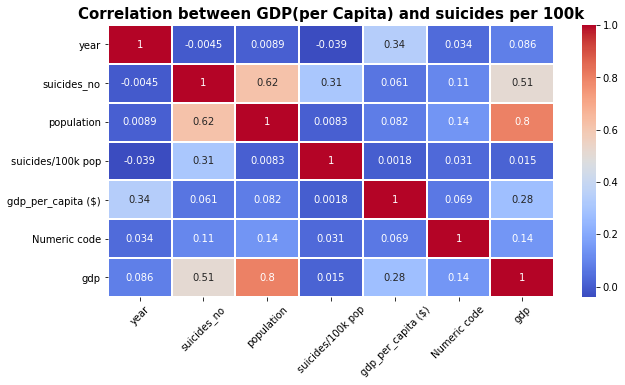

In [27]:
rcParams['figure.figsize'] = [10,5]
sns.heatmap(df1.corr(), annot=True, linewidths=0.2, cmap='coolwarm' )
plt.title('Correlation between GDP(per Capita) and suicides per 100k', size=15, fontweight='bold') ;
plt.xticks(rotation=45)

# 6- Generation hue Gender Counter

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



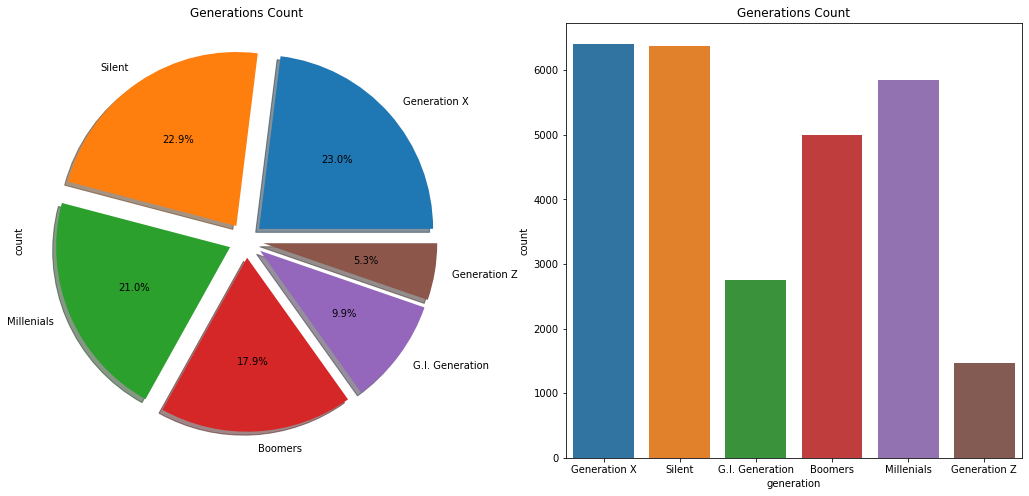

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df1['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('count')
sns.countplot('generation',data=df1,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

# 7- Which age of people suicide a most

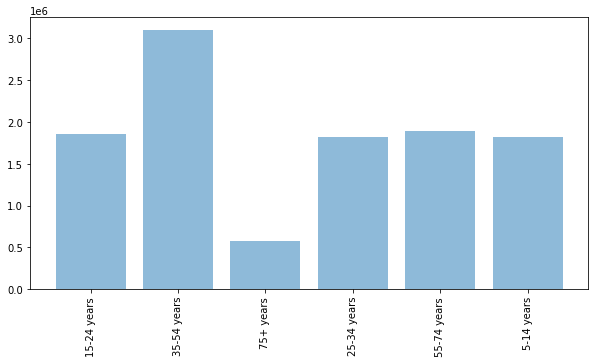

In [29]:
index_population=[]
for age in df1['age'].unique():
    index_population.append(sum(df1[df1['age']==age].population)/len(df1[df1['age']==age].population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

# 8-Which generation of people suicide a most

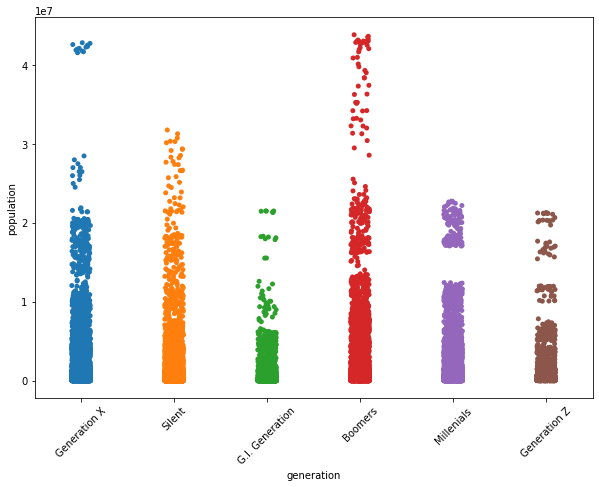

In [45]:
#px.scatter(df1,x = 'generation', y = 'population')
plt.figure(figsize=(10,7))
sns.stripplot(x="generation",y='population',data=df1)
plt.xticks(rotation=45)
plt.show()

